In [2]:
# import librairies

import pandas as pd
import nltk
import numpy as np 
import matplotlib.pyplot as plt
import demoji
import matplotlib.pyplot as plt

# demoji.download_codes()

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk import FreqDist


In [3]:
# importing dataset

data = pd.read_csv("./covid_fake_news-main/english_test_with_labels.csv")
data.head()

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [4]:
data["label"].value_counts(normalize=True) * 100

real    52.336449
fake    47.663551
Name: label, dtype: float64

## Tweets containing fake news (47%)

In [5]:
# extracting tweets into one block of text

faketext = data[data["label"] == "fake"]
faketext = faketext["tweet"]
faketext = [l for l in faketext]
faketext = " ".join(faketext)

# tokenize

tokens = word_tokenize(faketext)

# remove stop words

stop_words = set(stopwords.words("english"))

filtered_list = []

for word in tokens:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

# remove punctuation, conjunctions, etc

punctuation = [".", ",", "(", ")", "?", "!", ":", "&", "#", ";", "@", "%", "'s", '’', '``', "''", '�', '”', '“', "n't", "would", '‘', "...", "..", '', "-"]

filtered_no_punc = []

for word in filtered_list:
    if word not in punctuation:
        filtered_no_punc.append(word)

# removing urls

no_url = []

for word in filtered_no_punc:
    if not word.startswith("/") and word != "https":
        no_url.append(word)

# change to lowercase

no_url = [word.lower() for word in no_url]

test = " ".join(no_url)

another = demoji.replace(test, "")

demoji.findall(another)

no_url = another.split(" ")


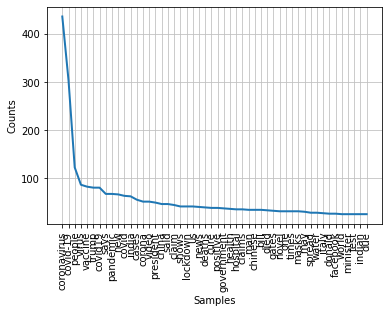

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
# creating frequency distribution --> most common words (key)

what = Text(no_url)

freq_dist = FreqDist(what)

freq_dist.plot(50, cumulative=False)

In [7]:
key_words = freq_dist.most_common(100)
key_words

[('coronavirus', 436),
 ('covid-19', 304),
 ('people', 123),
 ('virus', 87),
 ('vaccine', 83),
 ('trump', 81),
 ('covid19', 81),
 ('says', 68),
 ('pandemic', 68),
 ('new', 67),
 ('covid', 64),
 ('india', 63),
 ('cases', 56),
 ('corona', 52),
 ('video', 52),
 ('president', 50),
 ('china', 47),
 ('said', 47),
 ('claim', 45),
 ('shows', 42),
 ('lockdown', 42),
 ('us', 42),
 ('news', 41),
 ('deaths', 40),
 ('cure', 39),
 ('positive', 39),
 ('government', 38),
 ('health', 37),
 ('hospital', 36),
 ('claims', 36),
 ('man', 35),
 ('chinese', 35),
 ('bill', 35),
 ('died', 34),
 ('gates', 33),
 ('novel', 32),
 ('one', 32),
 ('times', 32),
 ('masks', 32),
 ('may', 31),
 ('spread', 29),
 ('water', 29),
 ('italy', 28),
 ('donald', 27),
 ('facebook', 27),
 ('world', 26),
 ('minister', 26),
 ('test', 26),
 ('indian', 26),
 ('due', 26),
 ('social', 25),
 ('time', 25),
 ('doctor', 24),
 ('medical', 24),
 ('mask', 24),
 ('post', 22),
 ('shared', 22),
 ('get', 21),
 ('media', 21),
 ('amp', 21),
 ('day', 

<p> Some words of interest: </p>
<ul>
<li> flu </li>
<li> cure </li>
<li> mask(s) </li>
<li> trump </li>
<li> vaccine </li>
<li> government </li>
</ul>

In [8]:
what.collocations()

bill gates; donald trump; novel coronavirus; video shows; corona
virus; social media; thousands times; facebook twitter; joe biden;
social distancing; president trump; tested positive; pradhan mantri;
face masks; alongside claim; coronavirus pandemic; new york; united
states; confirmed case; anthony fauci


<p> Using these words of interest, we can view the context of the tweets in which they appear. </p>

In [9]:
what.concordance("video")

Displaying 25 of 52 matches:
donesian muslim mullahs salem mosque video shows applying putting saliva spoons
d sacred book favors lord would deny video claiming bodies packed body bags dum
stancing norms claim misleading 2019 video passed recent one covid19 bangalore 
s trump-branded coronavirus medicine video tabligi pilgrims moving via trucks s
tory last 4 years search post notmyp video claims bill gates made presentation 
ying coronavirus victims china viral video shows group doctors airing unproven 
oronavirus engineered scientists lab video doctor press conference said 5g caus
id-19 infected patients treated free video shows bill gates admits vaccine doub
ot covid-19 man made virus according video plandemic _a video purports show pol
e virus according video plandemic _a video purports show police officer beaten 
shing coronalockdown cbs aired wrong video footage coronavirus hospital casuall
ure covid-19 donaldtrump coronavirus video migrants overcrowded train mumbai we
udhirchaudh

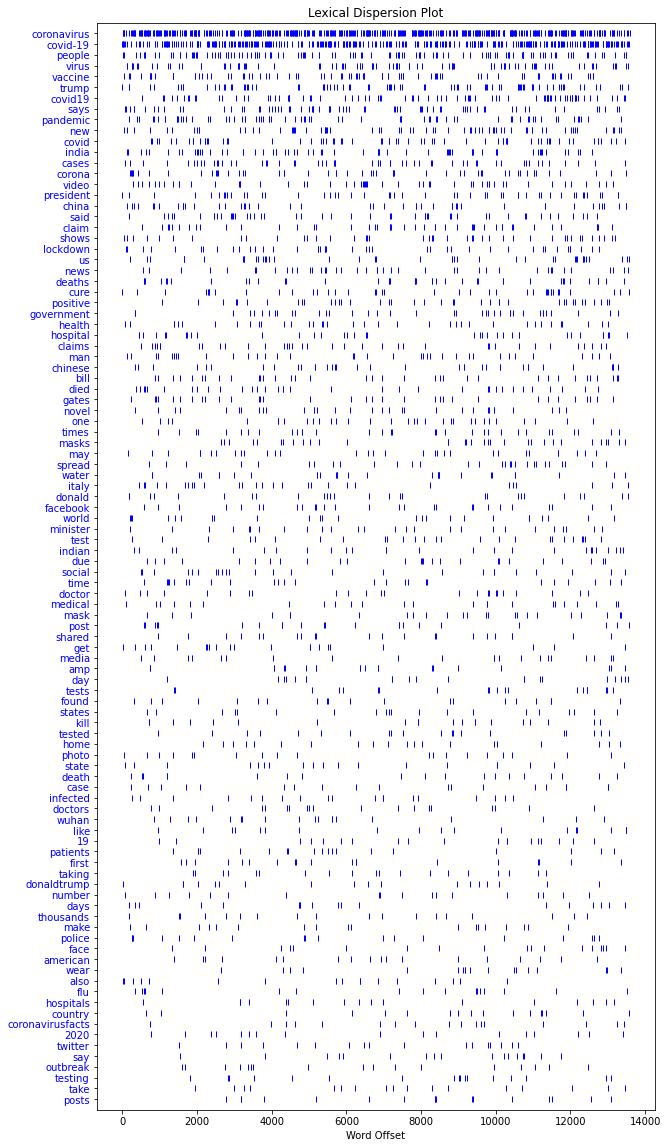

In [15]:
plt.figure(figsize=(10, 20))

what.dispersion_plot([word[0] for word in key_words])

## Tweets containing real news (53%)


In [18]:
realtext = data[data["label"] == "real"]
realtext = realtext["tweet"]
realtext = [l for l in realtext]
realtext = " ".join(realtext)

# tokenize

tokensr = word_tokenize(realtext)
tokensr

# remove stop words

filtered_listr = []

for word in tokensr:
    if word.casefold() not in stop_words:
        filtered_listr.append(word)

# remove punctuation, conjunctions, etc

filtered_no_puncr = []

for word in filtered_listr:
    if word not in punctuation:
        filtered_no_puncr.append(word)

# removing urls

no_urlr = []

for word in filtered_no_puncr:
    if not word.startswith("/") and word != "https":
        no_urlr.append(word)

# change to lowercase

no_urlr = [word.lower() for word in no_urlr]

testr = " ".join(no_urlr)

anotherr = demoji.replace(testr, "")

demoji.findall(anotherr)

no_urlr = anotherr.split(" ")


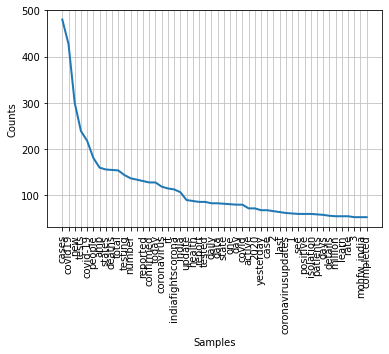

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
# creating frequency distribution --> most common words (key)

whatr = Text(no_urlr)

freq_distr = FreqDist(whatr)

freq_distr.plot(50, cumulative=False)

In [20]:
key_wordsr = freq_distr.most_common(100)
key_wordsr

[('cases', 480),
 ('covid19', 427),
 ('new', 300),
 ('tests', 239),
 ('covid-19', 218),
 ('people', 181),
 ('amp', 160),
 ('states', 156),
 ('deaths', 155),
 ('total', 154),
 ('testing', 144),
 ('number', 137),
 ('', 134),
 ('reported', 131),
 ('confirmed', 128),
 ('today', 128),
 ('coronavirus', 119),
 ('rt', 115),
 ('indiafightscorona', 113),
 ('india', 107),
 ('update', 90),
 ('health', 88),
 ('report', 86),
 ('tested', 86),
 ('daily', 83),
 ('data', 83),
 ('state', 82),
 ('one', 81),
 ('day', 80),
 ('covid', 80),
 ('active', 72),
 ('2020', 72),
 ('yesterday', 68),
 ('case', 68),
 ('2', 66),
 ('last', 64),
 ('coronavirusupdates', 62),
 ('1', 61),
 ('see', 60),
 ('positive', 60),
 ('isolation', 60),
 ('patients', 59),
 ('days', 58),
 ('details', 56),
 ('million', 55),
 ('learn', 55),
 ('rate', 55),
 ('3', 53),
 ('mohfw_india', 53),
 ('completed', 53),
 ('since', 52),
 ('numbers', 51),
 ('staysafe', 51),
 ('risk', 50),
 ('also', 50),
 ('spread', 50),
 ('managed', 49),
 ('september', 4

<p> Some things of note: </p>

<ul>
<li> more numbers (statistics?) </li>
<li> Stronger verbs (reported vs claims) </li>
<li> Less mention of public figures </li>

In [21]:
whatr.collocations()

managed isolation; confirmed cases; staysafe indiawillwin; new cases;
update published; active cases; daily update; total number; new
zealand; recovery rate; published tracked; covid_19 covidー19; note
track; 7-day average; tamil nadu; andhra pradesh; wash hands; state
reports; boris johnson; receiving hospital-level


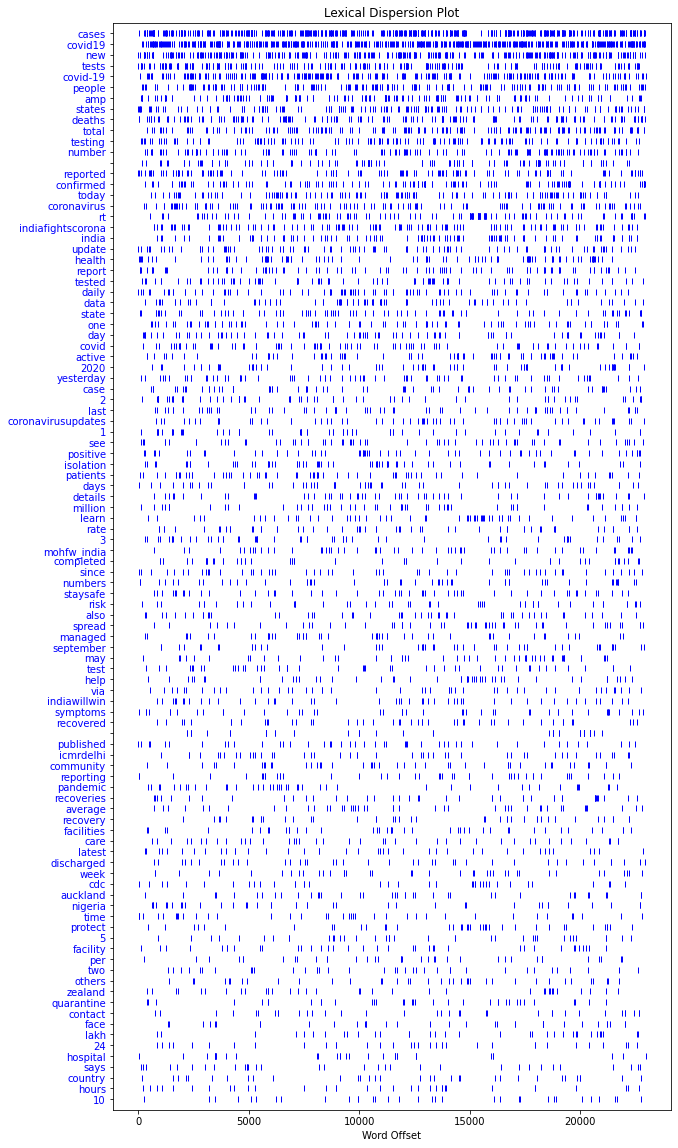

In [22]:
plt.figure(figsize=(10, 20))

whatr.dispersion_plot([word[0] for word in key_wordsr])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f4d88f7-58fe-4c32-b979-abb694c94f1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>